# Interferometro Michelson

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as LinearInterpolation

sys.path.append(dir_path)

In [2]:
ΔN = np.array([7, 16, 19, 30, 37, 45, 50, 62])
ΔD = np.array([3, 5, 7, 10.5, 13, 15, 17, 20]) * 10**-6

sigmaD = 10**-6
λ = 632.8 * 10**-9

   
Parameters: {'A': 3.3572186839495854e-07} 
Sigma parameters: {'A': 6.00624728363204e-09}

sigmaY: 1e-06

chiquadro ridotto: 0.31
df: 7
pvalue: 100.0%
covariance matrix: [[2.76199268e-17]]    



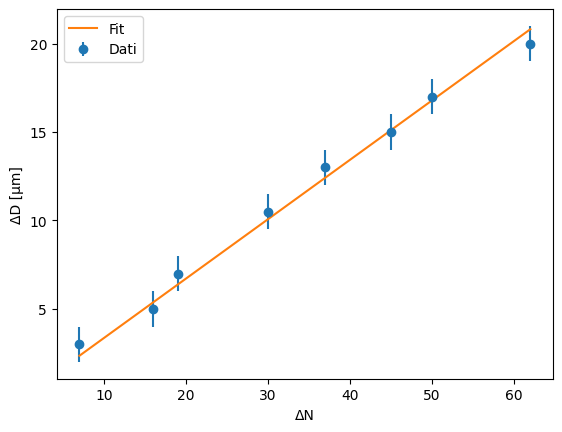

In [5]:
plt.errorbar(ΔN, ΔD, yerr=sigmaD, fmt='o', label='Dati')

fit = LinearInterpolation(ΔN, ΔD,lambda x,A: x*A, sigmaD,p0=[1],names='A')
print(fit)

plt.plot(fit.x_best, fit.y_best, label='Fit')
plt.xlabel('ΔN')
plt.ylabel('ΔD [μm]')
plt.yticks(
    np.arange(5, 25, 5)*10**-6,
    np.arange(5,25,5))
plt.legend()
plt.show()

$\Delta D = \frac{\lambda}{2\cos\theta}\cdot\Delta N$

$A = \frac{\lambda}{2\cos\theta} \Rightarrow \cos\theta = \frac{\lambda}{2A}$

In [6]:
# trovare la sensibilità del micrometro ossia il DeltaD associato a 1 incremento di N

# A è la sensibilità dello strumento
A,sigmaA = fit.bval['A'],fit.sigma_bval['A']

print('Sensibilità: ', final_val(A,sigmaA,decimals=3,exp=-6,udm='m'))

cosθ = λ/(2*A)
sigmaCosθ = cosθ * np.abs(sigmaA/A)

print('cosθ: ',final_val(cosθ,sigmaCosθ,decimals=3,udm=''))

Sensibilità:  (0.336 ± 0.006)e-6 m
cosθ:  0.942 ± 0.017 
